In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    roc_curve,
    roc_auc_score
)

import joblib


In [2]:
# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

print("Features shape:", X.shape)
print("Labels shape:", y.shape)

# Class distribution
unique, counts = np.unique(y, return_counts=True)
print("Class distribution:", dict(zip(unique, counts)))


Features shape: (569, 30)
Labels shape: (569,)
Class distribution: {np.int64(0): np.int64(212), np.int64(1): np.int64(357)}


In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [4]:
linear_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(kernel='linear', probability=True))
])

linear_pipeline.fit(X_train, y_train)

y_pred_linear = linear_pipeline.predict(X_test)

print("Linear SVM Accuracy:", accuracy_score(y_test, y_pred_linear))
print(confusion_matrix(y_test, y_pred_linear))
print(classification_report(y_test, y_pred_linear))


Linear SVM Accuracy: 0.9736842105263158
[[41  1]
 [ 2 70]]
              precision    recall  f1-score   support

           0       0.95      0.98      0.96        42
           1       0.99      0.97      0.98        72

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [5]:
param_grid = {
    'svm__C': [0.1, 1, 10, 100],
    'svm__gamma': [0.001, 0.01, 0.1, 1]
}

grid_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(kernel='rbf', probability=True))
])

grid_search = GridSearchCV(
    grid_pipeline,
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best CV Accuracy:", grid_search.best_score_)

best_model = grid_search.best_estimator_


Best Parameters: {'svm__C': 10, 'svm__gamma': 0.01}
Best CV Accuracy: 0.9802197802197803


In [6]:
y_pred_best = best_model.predict(X_test)

print("Tuned Model Accuracy:", accuracy_score(y_test, y_pred_best))
print(confusion_matrix(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best))


Tuned Model Accuracy: 0.9824561403508771
[[41  1]
 [ 1 71]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        42
           1       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



AUC Score: 0.9976851851851851


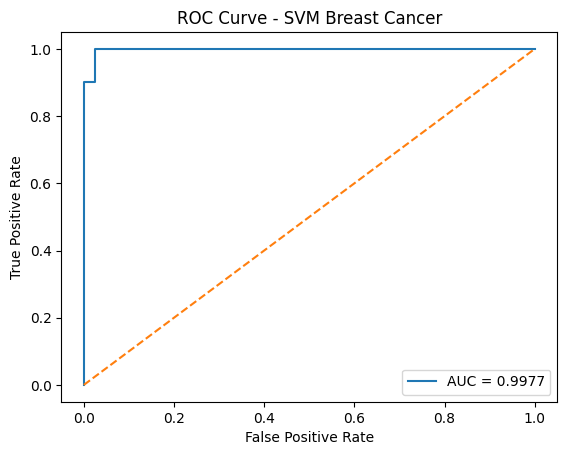

In [7]:
y_proba = best_model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_proba)
auc_score = roc_auc_score(y_test, y_proba)

print("AUC Score:", auc_score)

plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.4f}")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - SVM Breast Cancer")
plt.legend()
plt.show()


In [8]:
joblib.dump(best_model, "svm_breast_cancer_pipeline.pkl")
print("Model saved as svm_breast_cancer_pipeline.pkl")


Model saved as svm_breast_cancer_pipeline.pkl
